## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import make_interp_spline, BSpline

## Get Data

In [2]:
with open('./data/processed/codes_to_city_dict.txt', 'rb') as handle:
    codes_to_city = pickle.loads(handle.read())
with open('./data/processed/codes_to_carrier_dict.txt', 'rb') as handle:
    codes_to_carrier = pickle.loads(handle.read())
dat = pd.read_pickle('./data/processed/final/all-sched-enriched.pkl')
dat.head()

,operator,flight,aircraft,craft_capacity,frequency,weekly_flights,weekly_capacity,weekly_est_pass,from,from_time,...,to_time_slot,eff_from,eff_to,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,IND,6E 101,A 320,183,"[1, 2, 3, 4, 5, 6, 7]",7,1281,1125.0,MAA,6.25,...,15.0,2019-10-27 00:00:00,2020-03-28 00:00:00,True,True,True,True,True,True,True
1,IND,6E 103,A 320,183,"[1, 2, 3, 4, 5, 6, 7]",7,1281,1125.0,PNQ,22.33,...,1.0,2019-10-27 00:00:00,2020-03-28 00:00:00,True,True,True,True,True,True,True
2,IND,6E 104,A 320,183,"[1, 2, 3, 4, 5, 6, 7]",7,1281,1125.0,HYD,8.17,...,23.0,2019-10-27 00:00:00,2020-03-28 00:00:00,True,True,True,True,True,True,True
3,IND,6E 105,A 320,183,"[1, 2, 3, 4, 5, 7]",6,1098,964.0,PNQ,17.33,...,38.0,2019-10-27 00:00:00,2020-03-28 00:00:00,True,True,True,True,True,False,True
4,IND,6E 105,A 320,183,"[1, 2, 3, 4, 5, 7]",6,1098,964.0,DEL,14.75,...,34.0,2019-10-27 00:00:00,2020-03-27 00:00:00,True,True,True,True,True,False,True


### Overview

In [96]:
n_flights = dat['weekly_flights'].sum()
operators = dat['operator'].unique()
n_operators = len(operators)
cities = list(set(dat['from'].tolist() + dat['to'].tolist()))
n_cities = len(cities)

print('In a week, %i operators run %i domestic flights into and out of %i Indian cities.\n' % 
      (n_operators, n_flights, n_cities))
print('A flight departs from and arrives into a different city, so the %i flights result in' % n_flights)
print('a weekly total of %i arrivals and departures.' % (2*n_flights))

In a week, 9 operators run 21953 domestic flights into and out of 102 Indian cities.

A flight departs from and arrives into a different city, so the 21953 flights result in
a weekly total of 43906 arrivals and departures.


### Operator Marketshares

#### Weekly Flights Marketshare

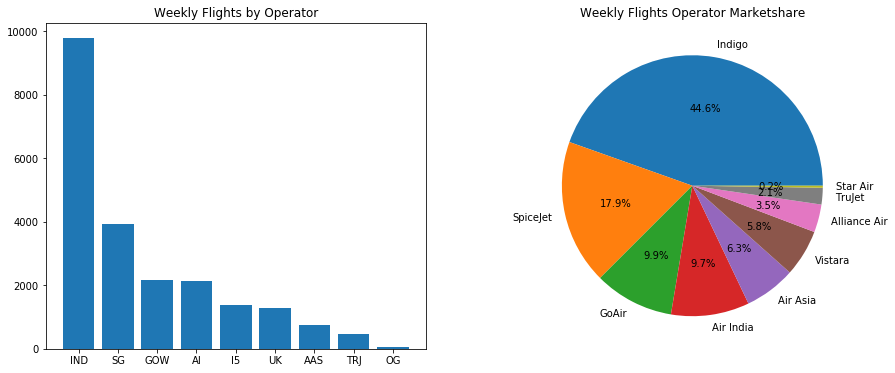

In [4]:
df = pd.DataFrame(data = None, index = codes_to_carrier.keys(), columns = ['weekly_flights', 'mkt_share'])
for operator in operators:
    op_flights = dat.query('operator == @operator')['weekly_flights'].sum()
    df.loc[df.index == operator, 'weekly_flights'] = op_flights
    df.loc[df.index == operator, 'mkt_share'] = round(op_flights/n_flights, 4)

df = df.sort_values(by = 'weekly_flights', ascending = False)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.bar(df.index, df.weekly_flights)
plt.title('Weekly Flights by Operator')

plt.subplot(1, 2, 2)
plt.pie(df.mkt_share, radius = 1, autopct = '%1.1f%%', 
        labels = [codes_to_carrier[value] for value in df.index])
plt.title('Weekly Flights Operator Marketshare')

plt.show()

<ul>
    <li>Indigo is far and away the dominant player in the market with SpiceJet a distant second.
    <li>The marketshares of Air India(9.7%) and Alliance Air(3.5%) combined ranks the state-run operator third
        in the list.
</ul>

#### Weekly Capacity Marketshare

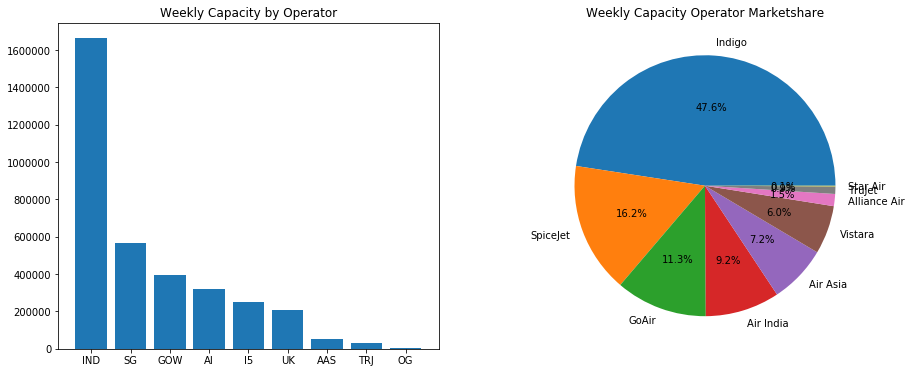

In [5]:
df = pd.DataFrame(data = None, index = codes_to_carrier.keys(), columns = ['weekly_capacity', 'mkt_share'])
for operator in operators:
    op_capacity = dat.query('operator == @operator')['weekly_capacity'].sum()
    df.loc[df.index == operator, 'weekly_capacity'] = op_capacity
    df.loc[df.index == operator, 'mkt_share'] = round(op_capacity/sum(dat.weekly_capacity), 4)

df = df.sort_values(by = 'weekly_capacity', ascending = False)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.bar(df.index, df.weekly_capacity)
plt.title('Weekly Capacity by Operator')

plt.subplot(1, 2, 2)
plt.pie(df.mkt_share, radius = 1, autopct = '%1.1f%%', 
        labels = [codes_to_carrier[value] for value in df.index])
plt.title('Weekly Capacity Operator Marketshare')

plt.show()

#### Weekly Estimated Passengers Marketshare

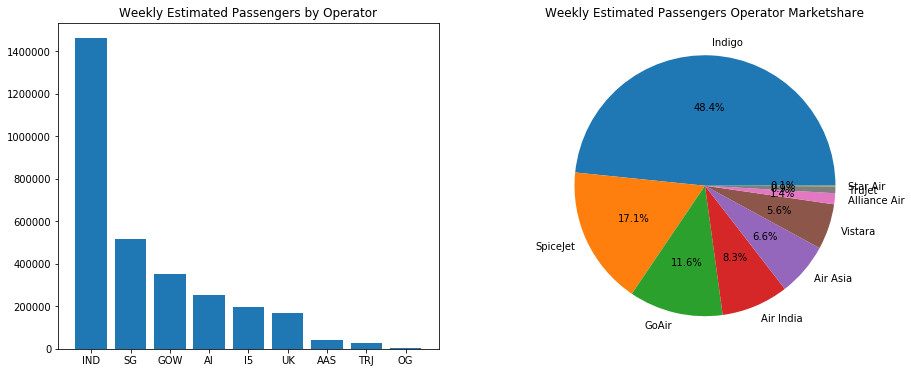

In [6]:
df = pd.DataFrame(data = None, index = codes_to_carrier.keys(), columns = ['weekly_est_pass', 'mkt_share'])
for operator in operators:
    op_capacity = dat.query('operator == @operator')['weekly_est_pass'].sum()
    df.loc[df.index == operator, 'weekly_est_pass'] = op_capacity
    df.loc[df.index == operator, 'mkt_share'] = round(op_capacity/sum(dat.weekly_est_pass), 4)

df = df.sort_values(by = 'weekly_est_pass', ascending = False)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.bar(df.index, df.weekly_est_pass)
plt.title('Weekly Estimated Passengers by Operator')

plt.subplot(1, 2, 2)
plt.pie(df.mkt_share, radius = 1, autopct = '%1.1f%%', 
        labels = [codes_to_carrier[value] for value in df.index])
plt.title('Weekly Estimated Passengers Operator Marketshare')

plt.show()

<ul>
    <li>Indigo is clearly the 800 pound gorrila of the Indian domestic aviation sector flying almost 50% of all passengers.
    <li>GoAir "improves" its performance even more capturing relatively higher marketshare of the passengers. This is impressive given that it has a relatively smaller marketshare by total number of flights. 
</ul>

#### Top Cities Marketshare

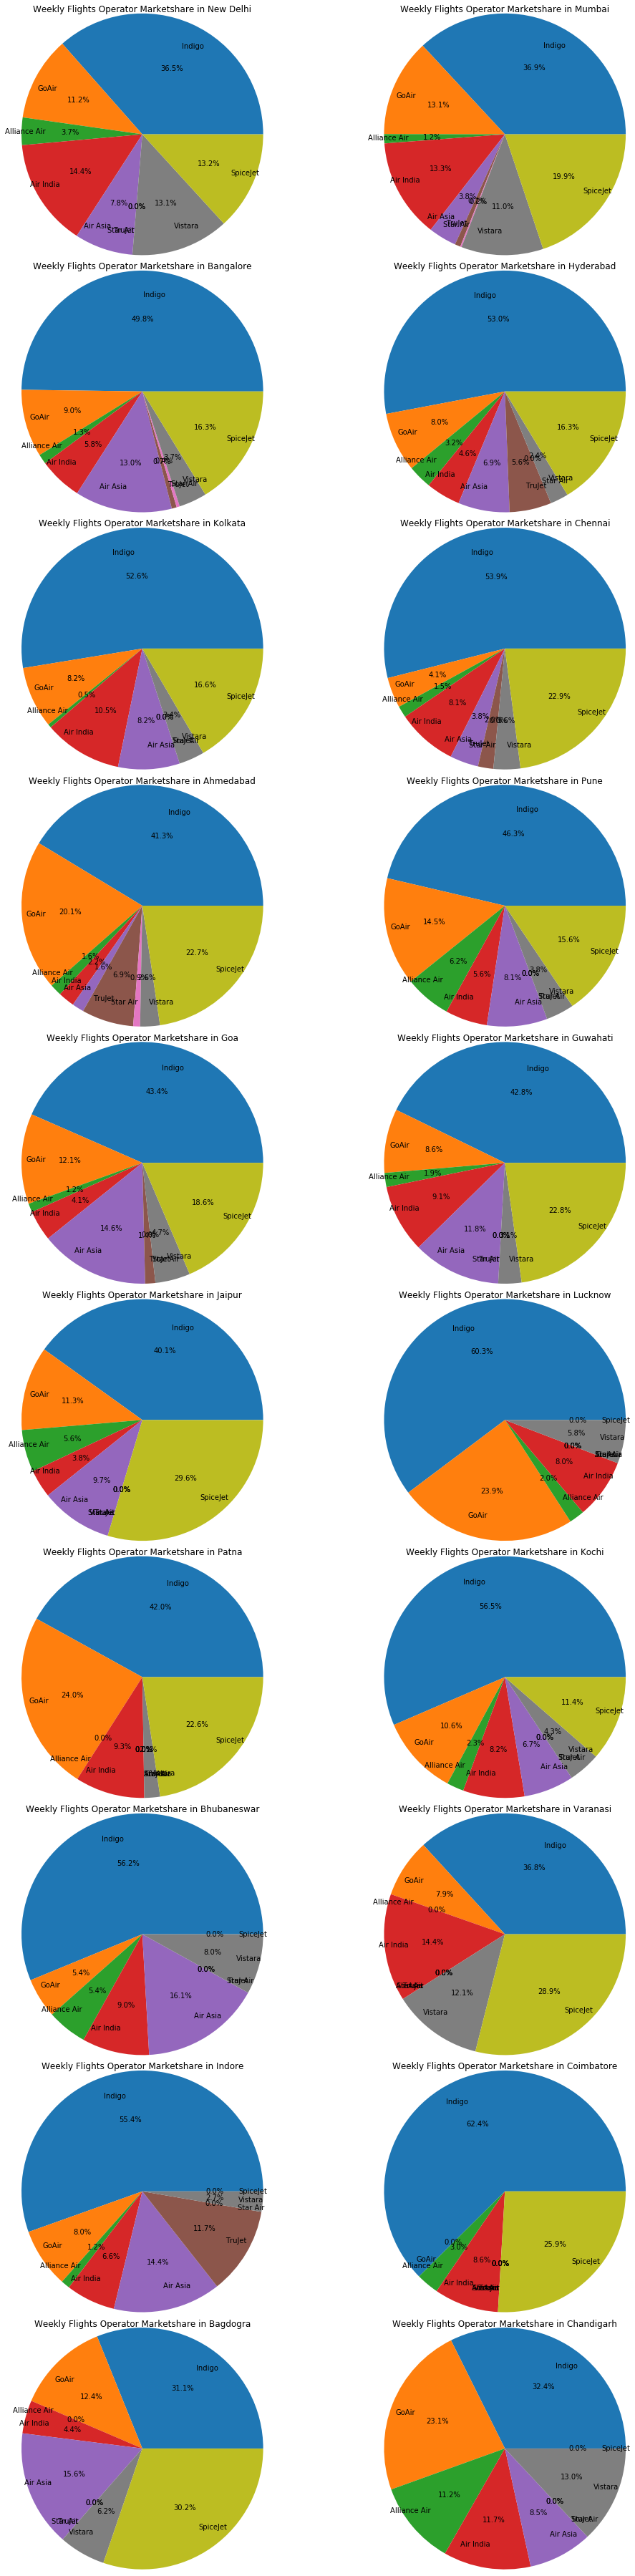

In [101]:
top_cities = ['DEL', 'BOM', 'BLR', 'HYD', 'CCU', 'MAA', 'AMD', 'PNQ', 'GOI', 'GAU', 'JAI', 'LKO', 'PAT', 
              'COK', 'BBI', 'VNS', 'IDR', 'CJB', 'IXB', 'IXC']

plt.figure(figsize = (15, 50))
n_col = 2
n_row = np.ceil(len(top_cities)/n_col)
i = 1

for city in top_cities:
    df = pd.DataFrame(data = None, index = codes_to_carrier.keys(), columns = ['weekly_flights', 'mkt_share'])
    n_city_flights = dat.query('`from` == @city | to == @city')['weekly_flights'].sum()
    for operator in operators:
        op_flights = dat.query('(operator == @operator) & (`from` == @city | to == @city)')['weekly_flights'].sum()
        df.loc[df.index == operator, 'weekly_flights'] = op_flights
        df.loc[df.index == operator, 'mkt_share'] = round(op_flights/n_city_flights, 4)
    

    plt.subplot(n_row, n_col, i)
    plt.pie(df.mkt_share, radius = 1.5, autopct = '%1.1f%%', labeldistance = 0.8, 
            labels = [codes_to_carrier[value] for value in df.index])
    plt.title('Weekly Flights Operator Marketshare in %s' % codes_to_city[city], pad = 30)
    i += 1

plt.tight_layout()
plt.show()
    

### Operators' Top Cities

In [193]:
operators = dat['operator'].unique()
#operators = ['IND']
#foo = 0

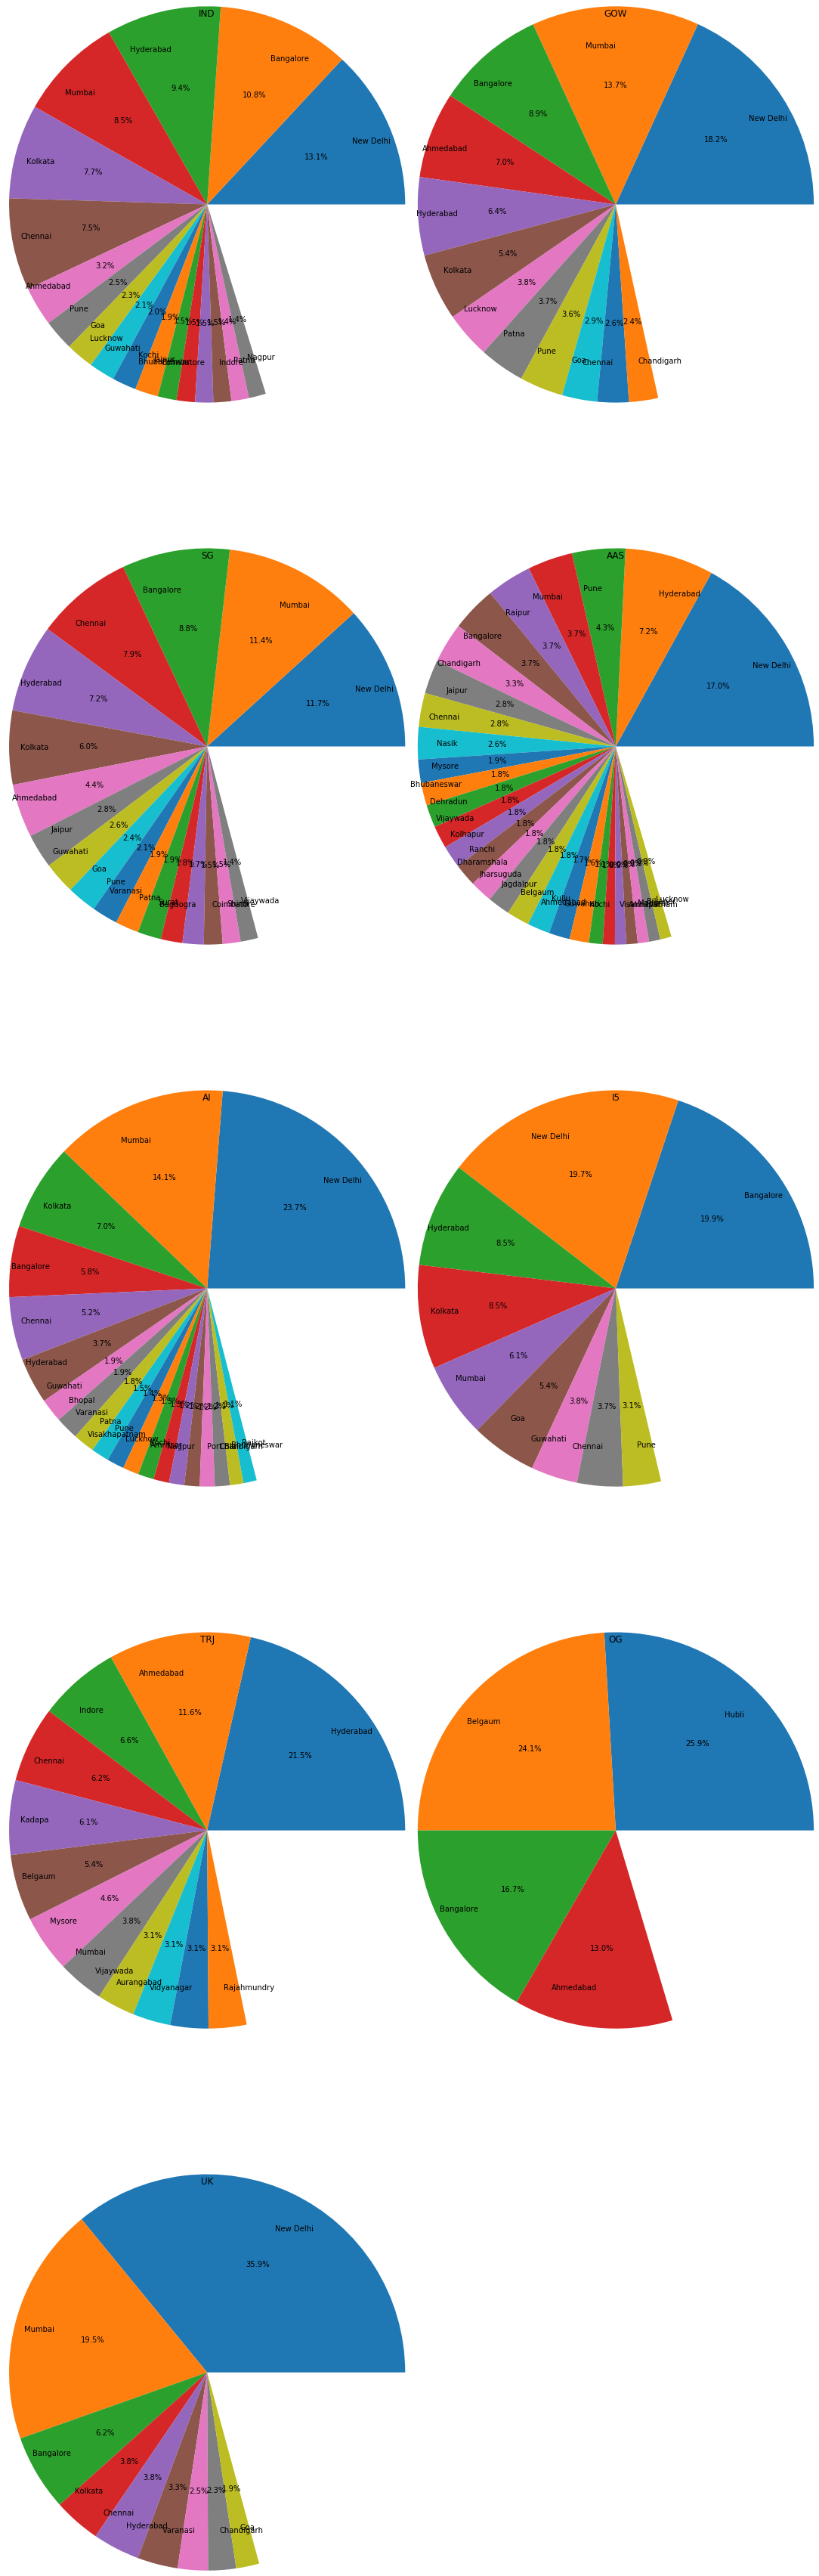

In [195]:
plt.figure(figsize = (15, 50))
n_col = 2
n_row = np.ceil(n_operators/n_col)
i = 1

for operator in operators:
    df = pd.DataFrame(data = None, index = codes_to_city.keys(), columns = ['weekly_mvmnts', 'share'])
    n_opr_mvmnts = dat.query('operator == @operator')['weekly_flights'].sum()*2
    for city in codes_to_city.keys():
        cty_mvmnts = dat.query('(operator == @operator) & (`from` == @city | to == @city)')['weekly_flights'].sum()
        df.loc[df.index == city, 'weekly_mvmnts'] = cty_mvmnts
        df.loc[df.index == city, 'share'] = cty_mvmnts/n_opr_mvmnts
        
    df = df.sort_values(by = 'share', ascending = False)
    df['cum_sum'] = df.share.cumsum()
    indx = df[df.cum_sum <= 0.8].index.tolist()
    df = df[df.index.isin(indx)]
    
    plt.subplot(n_row, n_col, i)
    plt.pie(df.share, radius = 1.5, autopct = '%1.1f%%', labeldistance = 0.8, 
            labels = [codes_to_city[value] for value in df.index])
    plt.title('%s' % operator, pad = 30)
    i += 1

'''for city in top_cities:
    df = pd.DataFrame(data = None, index = codes_to_carrier.keys(), columns = ['weekly_flights', 'share'])
    n_city_flights = dat.query('`from` == @city | to == @city')['weekly_flights'].sum()
    for operator in operators:
        op_flights = dat.query('(operator == @operator) & (`from` == @city | to == @city)')['weekly_flights'].sum()
        df.loc[df.index == operator, 'weekly_flights'] = op_flights
        df.loc[df.index == operator, 'share'] = round(op_flights/n_city_flights, 4)

    plt.subplot(n_row, n_col, i)
    plt.pie(df.share, radius = 1.5, autopct = '%1.1f%%', labeldistance = 0.8, 
            labels = [codes_to_carrier[value] for value in df.index])
    plt.title('Weekly Flights Operator Marketshare in %s' % codes_to_city[city], pad = 30)
    i += 1'''

plt.tight_layout()
plt.show()
    

In [190]:
df.head(25)

,weekly_mvmnts,share,cum_sum
DEL,2557,0.130659,0.130659
BLR,2121,0.10838,0.239039
HYD,1832,0.0936127,0.332652
BOM,1671,0.0853858,0.418038
CCU,1507,0.0770056,0.495043
MAA,1470,0.075115,0.570158
AMD,626,0.0319877,0.602146
PNQ,494,0.0252427,0.627389
GOI,446,0.02279,0.650179
LKO,414,0.0211548,0.671334


In [4]:
weeklies_ = ['weekly_flights', 'weekly_capacity', 'weekly_est_pass']

from_flights = dat.groupby(['from'])[weeklies_].sum()
to_flights = dat.groupby(['to'])[weeklies_].sum()

sdat = pd.concat([from_flights, to_flights], axis = 1, ignore_index = True)
sdat = sdat.fillna(0, axis = 1, downcast = 'infer') # if there are no flights either from or to a city, 
                                                    # replace NA by 0
sdat = sdat.rename(columns = {0:'from_weekly_flights', 
                                            3:'to_weekly_flights',
                                            1:'from_weekly_capacity',
                                            4:'to_weekly_capacity',
                                            2:'from_weekly_est_pass',
                                            5:'to_weekly_est_pass'}, errors = 'raise')

sdat['total_weekly_mvmnts'] = sdat.apply(lambda row: row.from_weekly_flights + row.to_weekly_flights,axis = 1)
sdat['total_weekly_capacity'] = sdat.apply(lambda row: row.from_weekly_capacity + row.to_weekly_capacity, 
                                           axis = 1)
sdat['total_weekly_est_pass'] = sdat.apply(lambda row: row.from_weekly_est_pass + row.to_weekly_est_pass, 
                                           axis = 1)

sdat.head()

,from_weekly_flights,from_weekly_capacity,from_weekly_est_pass,to_weekly_flights,to_weekly_capacity,to_weekly_est_pass,total_weekly_mvmnts,total_weekly_capacity,total_weekly_est_pass
AGR,4,280,218,4,280,218,8,560,436
AGX,7,490,383,7,490,383,14,980,766
AIP,7,546,500,7,546,500,14,1092,1000
AJL,11,1342,1046,24,3782,3223,35,5124,4269
AMD,764,124123,109080,750,120574,105987,1514,244697,215067


In [5]:
def top_cities_feature(df, feature, threshold):
    '''
    
    Returns the list top cities (by code) that account for threshold percentage of weekly total of the 
    desired feature.
    
    '''
    
    df = df.sort_values(by = [feature], ascending = False)   
    total = df[feature].sum()
    top_cities = round(df[feature].cumsum()/total, 2)
        
    return top_cities[top_cities <= threshold].index.tolist()

#### Top Cities by Weekly Movements

20 cities account for 80% of weekly movements.

Cities accounting for 80% of weekly movements:
 ['New Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad', 'Pune', 'Goa', 'Guwahati', 'Jaipur', 'Lucknow', 'Patna', 'Kochi', 'Bhubaneswar', 'Varanasi', 'Indore', 'Coimbatore', 'Bagdogra', 'Chandigarh'] 



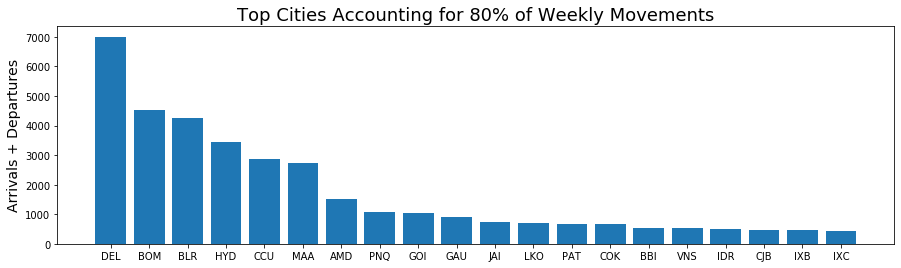

In [6]:
top_cities = top_cities_feature(sdat, 'total_weekly_mvmnts', 0.8)
top_cities_name = [codes_to_city[city] for city in top_cities]

print('%i cities account for 80%% of weekly movements.\n' % len(top_cities))
print('Cities accounting for 80% of weekly movements:\n', top_cities_name, '\n')

plt.figure(figsize = (15,4))
y = [sdat.iloc[sdat.index == city]['total_weekly_mvmnts'][0] for city in top_cities]
plt.bar(top_cities, y)
plt.title('Top Cities Accounting for 80% of Weekly Movements', size = 18)
plt.ylabel('Arrivals + Departures', size = 14)
plt.show()

#### Top Cities by Weekly Capacity

17 cities account for 80% of weekly capacity.

Cities accounting for 80% of weekly capacity:
 ['New Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad', 'Pune', 'Goa', 'Guwahati', 'Lucknow', 'Patna', 'Jaipur', 'Kochi', 'Bhubaneswar', 'Indore', 'Varanasi'] 



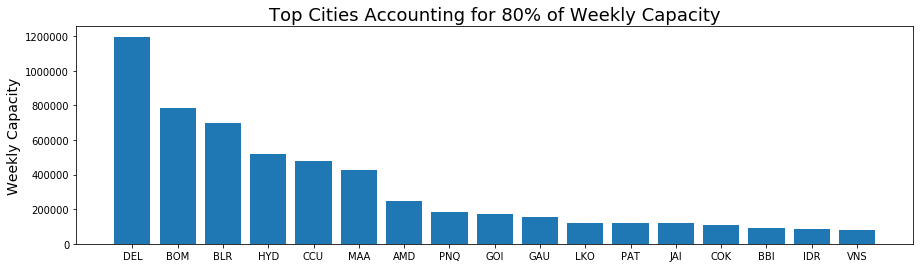

In [7]:
top_cities = top_cities_feature(sdat, 'total_weekly_capacity', 0.8)
top_cities_name = [codes_to_city[city] for city in top_cities]

print('%i cities account for 80%% of weekly capacity.\n' % len(top_cities))
print('Cities accounting for 80% of weekly capacity:\n', top_cities_name, '\n')

plt.figure(figsize = (15,4))
y = [sdat.iloc[sdat.index == city]['total_weekly_capacity'][0] for city in top_cities]
plt.bar(top_cities, y)
plt.title('Top Cities Accounting for 80% of Weekly Capacity', size = 18)
plt.ylabel('Weekly Capacity', size = 14)
plt.show()

#### Top Cities by Weekly Estimated Passengers

17 cities account for 80% of weekly estimated passengers.

Cities accounting for 80% of weekly estimated passengers:
 ['New Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad', 'Pune', 'Goa', 'Guwahati', 'Lucknow', 'Patna', 'Jaipur', 'Kochi', 'Bhubaneswar', 'Varanasi', 'Indore'] 



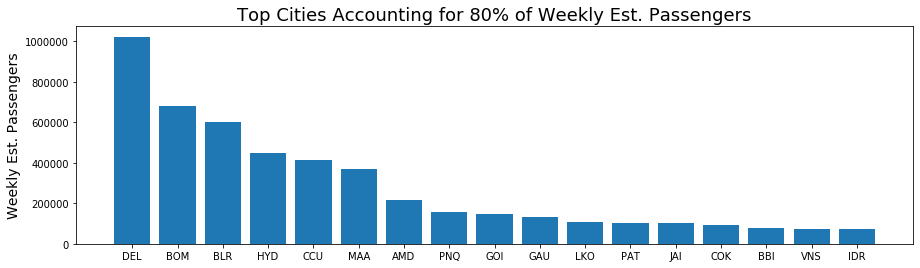

In [8]:
top_cities = top_cities_feature(sdat, 'total_weekly_est_pass', 0.8)
top_cities_name = [codes_to_city[city] for city in top_cities]

print('%i cities account for 80%% of weekly estimated passengers.\n' % len(top_cities))
print('Cities accounting for 80% of weekly estimated passengers:\n', top_cities_name, '\n')

plt.figure(figsize = (15,4))
y = [sdat.iloc[sdat.index == city]['total_weekly_est_pass'][0] for city in top_cities]
plt.bar(top_cities, y)
plt.title('Top Cities Accounting for 80% of Weekly Est. Passengers', size = 18)
plt.ylabel('Weekly Est. Passengers', size = 14)
plt.show()

#### Day-of-Week Distribution

<ul>
    <li>Plot the day-wise distribution for all arrivals and departures combined across all cities.
    <li>For the top cities by total weekly movements, for each city:
        <ol>
            <li>identify all schedules in and out of the city.
            <li>group the schedules by day of the week and count the total number of flights for the day.
            <li>plot the spread of the total daily movements for the city

In [9]:
def city_day_mvmnts(df, city = 'ALL'):
    
    ''' 
    
    For a city, returns the count of inward, outward and total movements by day of week.
    
    When combined across all cities, for any day, the total number of arrivals must be equal to the total
    number of departures. However, this may not be true when considering a particular city, i.e. the total 
    number of arrivals in a city may not be the same as the total number of departures. 
    
    '''
    
    mvmnts_in =[]
    mvmnts_out = []
    mvmnts = []
    
    if city == 'ALL':
        for i in range(1,8,1):
            day = 'day_' + str(i)
            mvmnts_out.append(dat.groupby([day, 'from'])[day].count()[1].sum())
    
        mvmnts = [value*2 for value in mvmnts_out]
    
    else:    
        idx = [i for i in df.index if df['from'][i] == city or df['to'][i] == city]
        sdf = df.iloc[idx, :]

        idx_in = [i for i in sdf.index if sdf['from'][i] != city] # flights into the city
        idx_out = [i for i in sdf.index if sdf['to'][i] != city]  # flights out of the city

        for i in range(1,8,1):
            day = 'day_' + str(i)
            mvmnts_in.append(sdf.loc[idx_in, :].groupby([day, 'from'])[day].count()[1].sum())
            mvmnts_out.append(sdf.loc[idx_out, :].groupby([day, 'to'])[day].count()[1].sum())

        mvmnts = [sum(x) for x in zip(mvmnts_in, mvmnts_out)]
    
    return mvmnts_in, mvmnts_out, mvmnts
    

In [10]:
def plot_distbn(mvmnts, freq, city = 'ALL', spline_pts = 100, smoothing_param = 2):
    
    '''
    
    Plots a smooth curve (spline) of either Day-of-Week or Time-of-Day distribution of movements.
    
    mvmnts - List of aggregate (days of week or timeslot of day) movements
    freq - either 'day' for Day-of-Week distribution or 'time' for Time-of-Day distribution
    city - either 'ALL' for all cities combined or the relevant IATA code for a specific city
    spline_pts, smoothing_param - parameters of the spline drawn
    
    '''
    
    if freq == 'day':
        x_orig = np.arange(1, 8 ,1)
        x_augm = np.linspace(1, 7, spline_pts)
        plt.xlabel('Day of the Week')
        if city == 'ALL': plt.title('Daily Total Movements - All Cities')
        else: plt.title('Daily Total Movements in %s' % codes_to_city[city])
    else:
        x_orig = np.arange(1, 49 ,1)
        x_augm = np.linspace(1, 48, spline_pts)
        plt.xlabel('Hour of the Day')
        plt.xticks(np.arange(0, 49, 2), labels = np.arange(0, 25, 1)) # to get 24 hours on the x-axis
        plt.axvline(x = 12, color = 'black', linestyle = '--')         # 6 a.m.
        plt.axvline(x = 24, color = 'black', linestyle = '--')         # 12 noon
        plt.axvline(x = 36, color = 'black', linestyle = '--')         # 6 p.m.
        if city == 'ALL': plt.title('Average Hourly Movements In a Day - All Cities')
        else: plt.title('Average Hourly Movements In a Day in %s' % codes_to_city[city])
        
    spline = make_interp_spline(x_orig, mvmnts, k = smoothing_param)
    y_axis = np.maximum(np.zeros(spline_pts), spline(x_augm))       # prevent y from taking a negative value
    plt.plot(x_augm, y_axis)
    plt.ylabel('Arrivals + Departures')
    
    return        

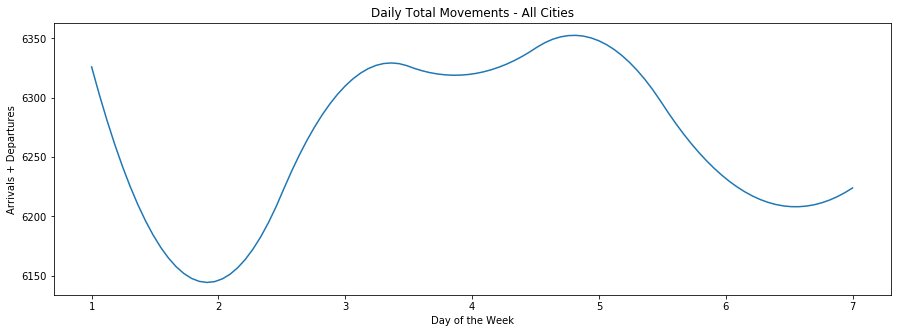

In [11]:
# For all cities combined

_, _, day_mvmnts = city_day_mvmnts(dat)

plt.figure(figsize = (15, 5))
plot_distbn(day_mvmnts, 'day')
plt.show()

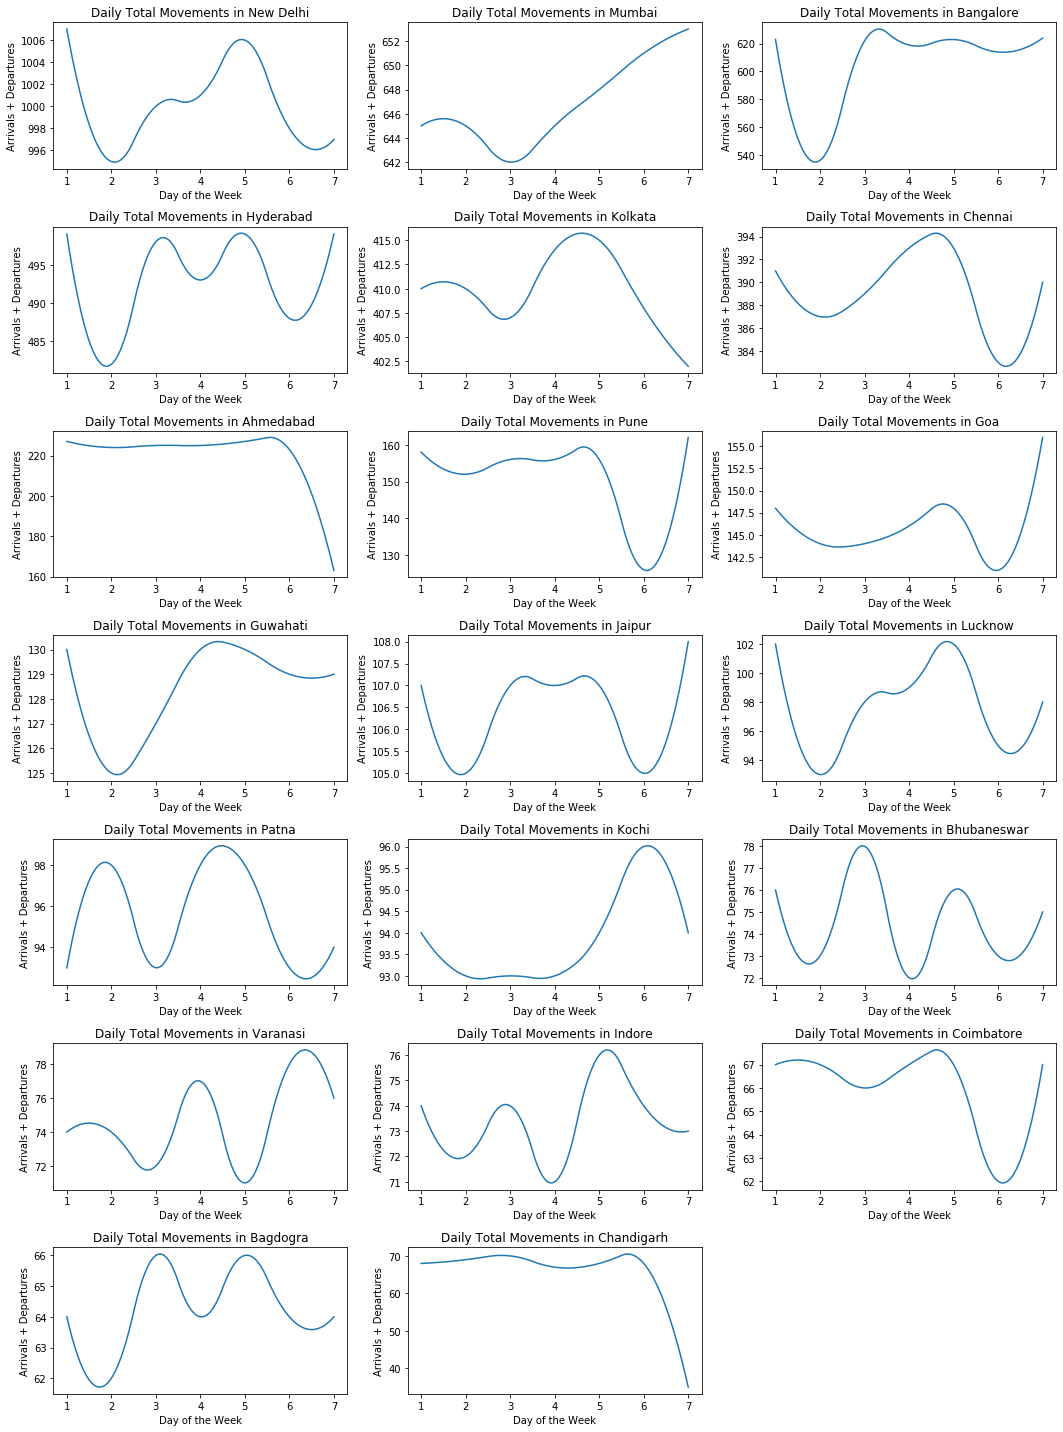

In [12]:
# For top cities by movements.

top_cities = top_cities_feature(sdat, 'total_weekly_mvmnts', 0.8)

plt.figure(figsize = (15, 20))

# Setting up some defaults for subplots
ncol = 3
nrow = np.ceil(len(top_cities)/ncol)
subplt_id = 1
   
for city in top_cities:
    _, _, day_mvmnts = city_day_mvmnts(dat, city)
      
    plt.subplot(nrow, ncol, subplt_id)
    subplt_id += 1
    plot_distbn(day_mvmnts, freq = 'day', city = city)

plt.tight_layout()
plt.show()

### Time-of-Day Distribution

In [13]:
def fill_missing(series, slots, na_val):
    
    '''
    
    In a series with an expected numerically ascending index, identifies if a particular index value
    is missing and inserts a new entry with such missing index value with the desired na_val.
    
    Finally, reorder the new series to ensure that the inserted index values are in their appropriate 
    position
    
    '''
    
    if series.shape[0] != slots:
        missing_idx = list(set(np.arange(1, slots+1, 1)).difference(series.index))
        for i in missing_idx:
            series[float(i)] = na_val
    
    series = series.sort_index()
    return series

In [14]:
def city_time_mvmnts(df, city = 'ALL'):
    
    ''' 
    
    For a city, returns the count of inward, outward and total movements by time of day.
    
    When combined across all cities, for any day, the total number of arrivals must be equal to the total
    number of departures. However, this may not be true when considering a particular city, i.e. the total 
    number of arrivals in a city may not be the same as the total number of departures. 
    
    '''
    
    mvmnts_in =[]
    mvmnts_out = []
    mvmnts = []
    
    if city == 'ALL':
        mvmnts_out = (df.groupby(['from_time_slot'])['weekly_flights'].sum())
        mvmnts_out = fill_missing(mvmnts_out, 48, 0)
        mvmnts = [value*2 for value in mvmnts_out]
    
    else:
        idx = [i for i in dat.index if dat['from'][i] == city or dat['to'][i] == city]
        sdat = dat.iloc[idx, :]

        idx_in = [i for i in sdat.index if sdat['to'][i] == city] # flights into the city
        idx_out = [i for i in sdat.index if sdat['from'][i] == city]  # flights out of the city

        mvmnts_in = (sdat.loc[idx_in, :].groupby(['to_time_slot'])['weekly_flights'].sum())
        mvmnts_in = fill_missing(mvmnts_in, 48, 0)
        mvmnts_out = (sdat.loc[idx_out, :].groupby(['from_time_slot'])['weekly_flights'].sum())
        mvmnts_out = fill_missing(mvmnts_out, 48, 0)
        mvmnts = [sum(x) for x in zip(mvmnts_in, mvmnts_out)]
    
    return mvmnts_in, mvmnts_out, mvmnts
    

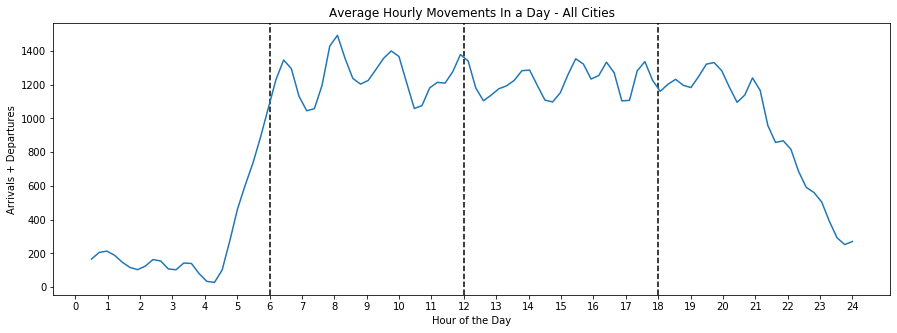

In [15]:
# For all cities combined

_, _, time_mvmnts = city_time_mvmnts(dat)

plt.figure(figsize = (15, 5))
plot_distbn(time_mvmnts, freq = 'time')
plt.show()

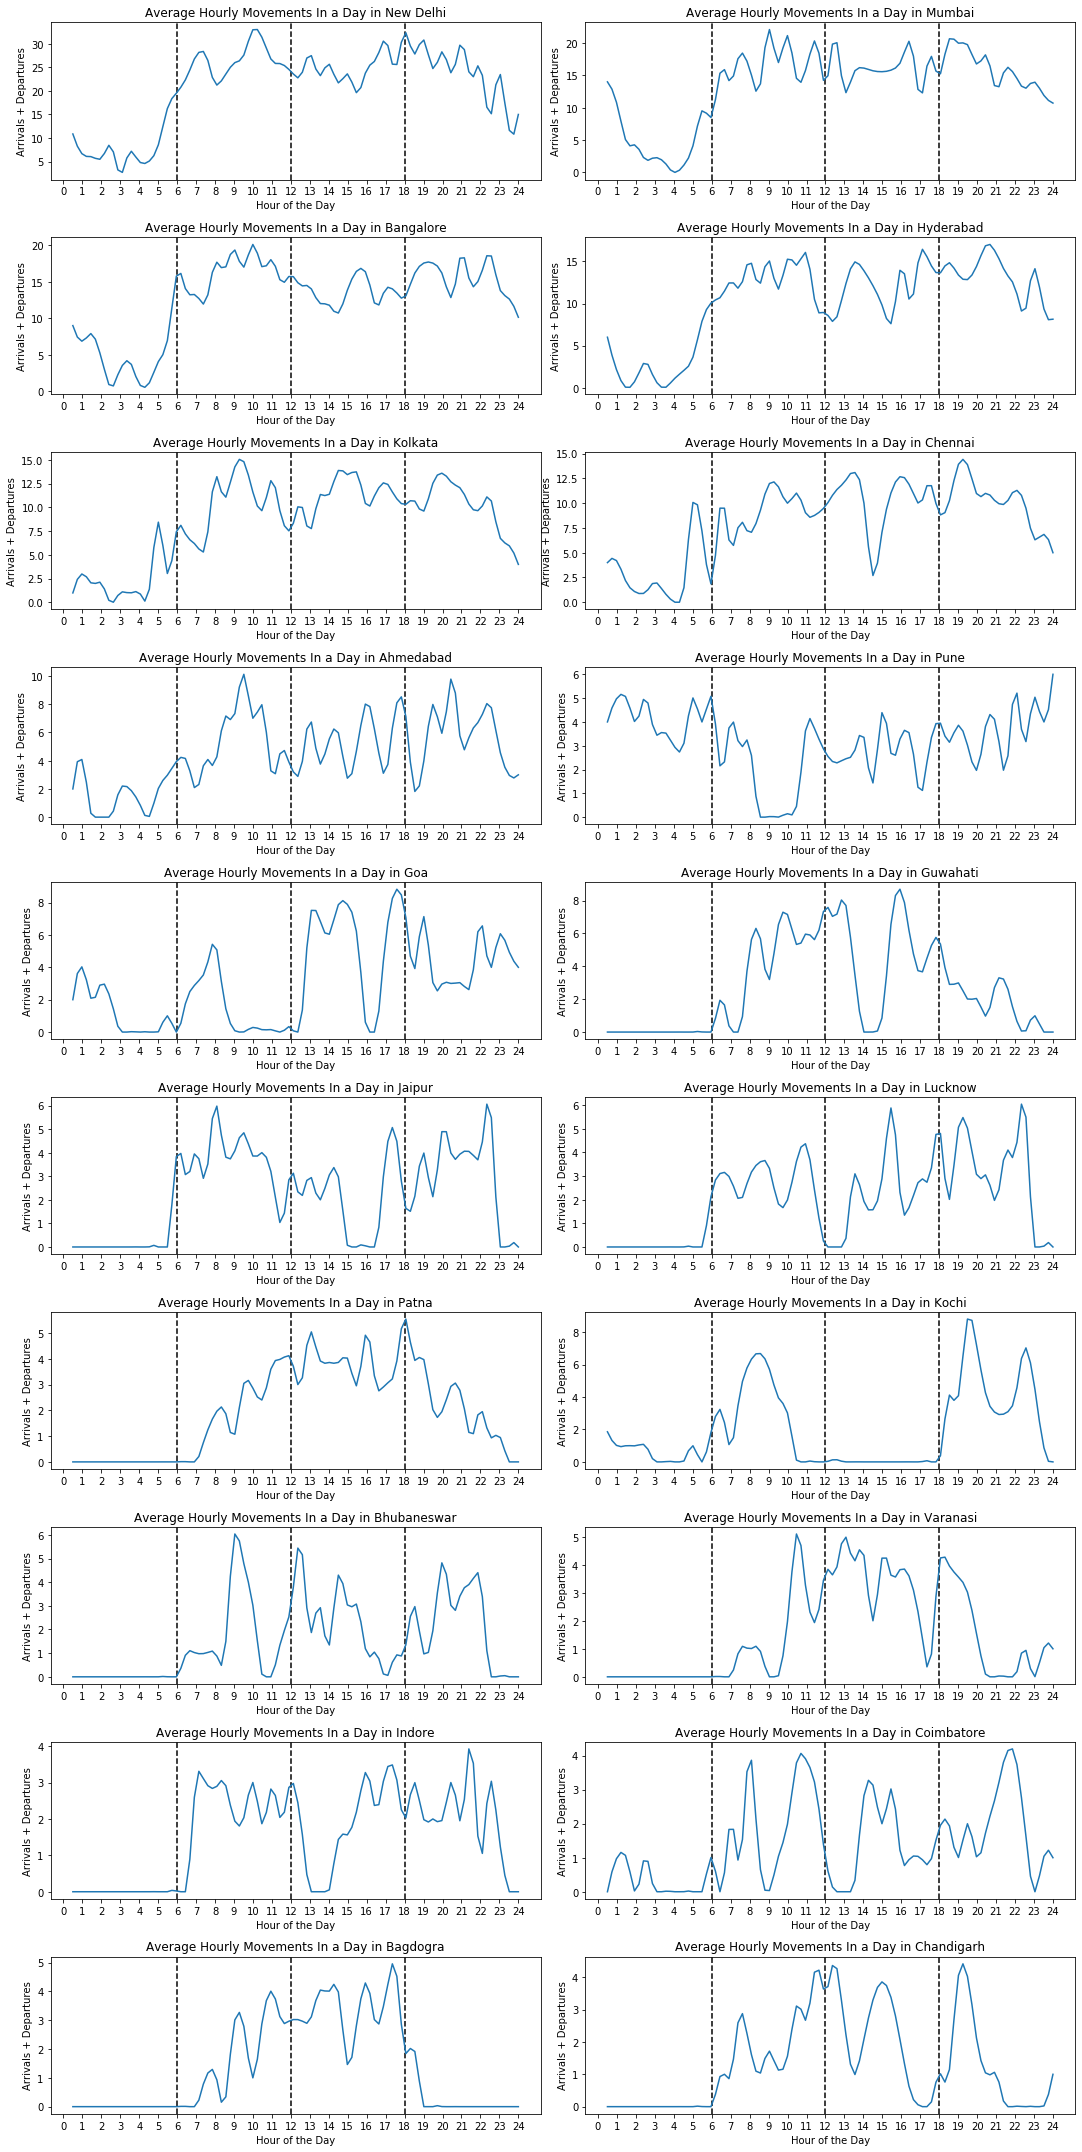

In [16]:
# For top cities by movements.

top_cities = top_cities_feature(sdat, 'total_weekly_mvmnts', 0.8)

plt.figure(figsize = (15, 30))

# Setting up some defaults for plots
ncol = 2
nrow = np.ceil(len(top_cities)/ncol)
subplt_id = 1

for city in top_cities:
    _, _, time_mvmnts = city_time_mvmnts(dat, city = city)
    time_mvmnts = [value/7 for value in time_mvmnts]              # averaging total weekly movements
    
    plt.subplot(nrow, ncol, subplt_id)
    subplt_id += 1
    plot_distbn(time_mvmnts, freq = 'hourly', city = city)

plt.tight_layout()
plt.show()

### Time-of-Day Distribution by Passenger Movement

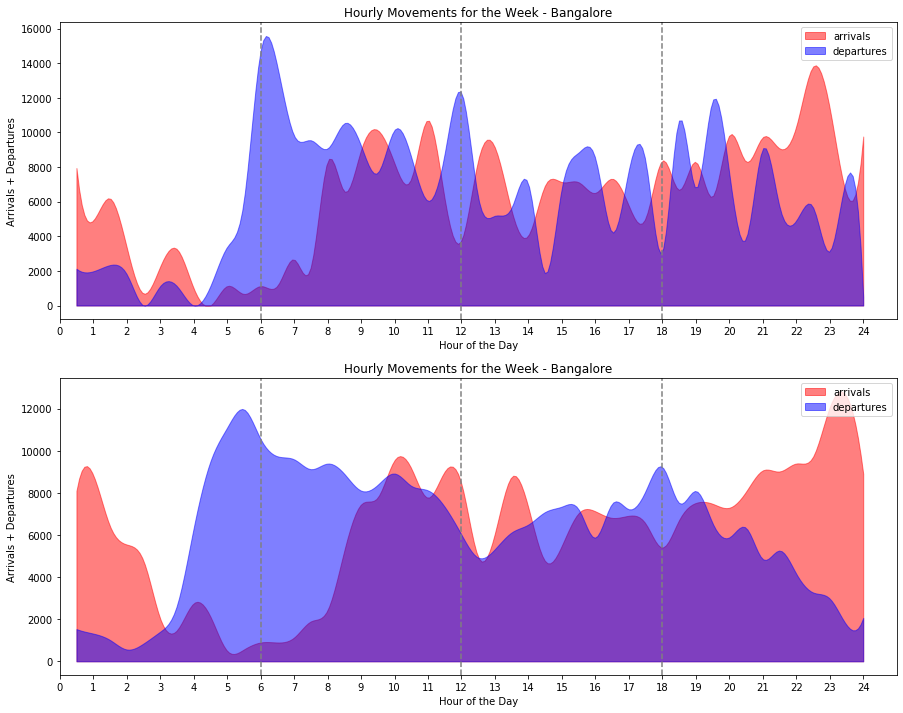

In [49]:
city_code = 'BLR'

timeslot_arr = []
timeslot_dep = []

idx = [i for i in dat.index if dat['from'][i] == city_code or dat['to'][i] == city_code]
sdat = dat.iloc[idx, :]

idx_in = [i for i in sdat.index if sdat['to'][i] == city_code] # flights into the city
idx_out = [i for i in sdat.index if sdat['from'][i] == city_code]  # flights out of the city

# Timeslot wise passenger traffic on incoming flights
pass_in_timeslot = (sdat.loc[idx_in, :].groupby(['to_time_slot'])['weekly_est_pass'].sum())
pass_in_timeslot = fill_missing(pass_in_timeslot, 48, 0)
#Timeslot wise passenger traffic on outgoing flights
pass_out_timeslot = (sdat.loc[idx_out, :].groupby(['from_time_slot'])['weekly_est_pass'].sum())
pass_out_timeslot = fill_missing(pass_out_timeslot, 48, 0)

'''Outgoing passengers start arriving at the airpot in 4 timeslots prior to the from_time_slot (evenly) and 
incoming passengers start departing from the airport in 2 slots post the to_time_slot (evenly). We adjust the 
timeslot passenger traffic values to reflect this spread.'''

in_slots = 2; out_slots = 4

pass_in_timeslot_adj = pd.Series(data = 0, index = pass_in_timeslot.index, dtype = 'float')
pass_out_timeslot_adj = pd.Series(data = 0, index = pass_out_timeslot.index, dtype = 'float')
        
for i in range(1, 49):              # spreading the passengers at the airport for incoming flights
    dist_ = pass_in_timeslot[i]/in_slots
    for j in range(i+1, i+3):
        if j > 48: j = j - 48
        pass_in_timeslot_adj[j] += dist_
        
for i in range(1, 49):              # spreading the passengers at the airport for outgoing flights
    dist_ = pass_out_timeslot[i]/out_slots
    for j in range(i-out_slots, i):
        if j < 1: j = 48 + j
        pass_out_timeslot_adj[j] += dist_

plt.figure(figsize = (15, 12))

plt.subplot(2, 1, 1)
plot_hourly(pass_in_timeslot, pass_out_timeslot, codes_to_city[city_code])

plt.subplot(2, 1, 2)
plot_hourly(pass_in_timeslot_adj, pass_out_timeslot_adj, codes_to_city[city_code])

plt.show()
